In [1]:
using LinearAlgebra
using FFTW
using ToeplitzMatrices
using SpecialMatrices
using Plots

In [50]:
#the input data
#T from a to b with δt as step
a = -4.0
δt = 0.005
b = 7
T = a:δt:b
Y = T.^3 - 5*T.^2 -T
N = length(Y)
L = floor(Int, N/2)
M = 4
##############################################################################################
#the algorithm

    #Hankel(first col, lasr row)
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
s = svd(I(N-L-1)Y1)                           #assuming svd transform of a matrix is unique!(but it could be a problem!)
Ze = inv(Diagonal(s.S))*s.U'*Y2*s.Vt'
z = eigen(Ze).values
S = log.(z)/δt
zm = z[end-(M-1):end]
#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zm)
vn = ceil(Int, N/M)
V = v
for i in 2:vn
    V = [V diagm(zm).^i*v]
end

Z = V[:, 1:N]
b = Z'\Y
#parameters done!
Ypred = real.(b'*Z)


1×2201 Matrix{Float64}:
 -143.624  -141.864  -140.117  …  89.2501  90.7611  92.2849  89.2502

In [51]:
S

1100-element Vector{ComplexF64}:
    -288.9193524911177 - 611.3505801112213im
    -288.9193524911177 + 611.3505801112213im
   -225.68337966301772 - 473.4464290092297im
   -225.68337966301772 + 473.4464290092297im
   -336.48751152188885 - 614.6642042414566im
   -336.48751152188885 + 614.6642042414566im
     -325.859676992873 - 559.4502711392753im
     -325.859676992873 + 559.4502711392753im
   -352.37509407549476 - 617.0038845984101im
   -352.37509407549476 + 617.0038845984101im
    -311.1789359370301 - 496.68903482922354im
    -311.1789359370301 + 496.68903482922354im
     -363.398897943012 - 589.3806086321548im
                       ⋮
   -334.09115297635316 - 33.010403924284944im
   -334.09115297635316 + 33.010403924284944im
    -271.6300493521817 - 132.3535879377456im
    -271.6300493521817 + 132.3535879377456im
    -310.9899347521759 + 0.0im
    -304.6075056353171 + 0.0im
   -21.067899798114322 - 140.9604947970603im
   -21.067899798114322 + 140.9604947970603im
  -0.0010627040786281

In [40]:
pinv(I*Y1)

1101×1100 Matrix{Float64}:
  5.92492e-6   5.85338e-6   5.78215e-6  …  -6.4252e-6   -6.49232e-6
  5.85343e-6   5.78272e-6   5.71232e-6     -6.35268e-6  -6.41904e-6
  5.78226e-6   5.71237e-6   5.6428e-6      -6.28048e-6  -6.34608e-6
  5.71141e-6   5.64235e-6   5.57359e-6     -6.2086e-6   -6.27346e-6
  5.64089e-6   5.57263e-6   5.50469e-6     -6.13704e-6  -6.20115e-6
  5.57068e-6   5.50324e-6   5.4361e-6   …  -6.06581e-6  -6.12917e-6
  5.50079e-6   5.43416e-6   5.36783e-6     -5.99489e-6  -6.05752e-6
  5.43121e-6   5.36539e-6   5.29987e-6     -5.9243e-6   -5.98619e-6
  5.36195e-6   5.29694e-6   5.23221e-6     -5.85402e-6  -5.91518e-6
  5.29301e-6   5.2288e-6    5.16487e-6     -5.78407e-6  -5.8445e-6
  5.22439e-6   5.16097e-6   5.09783e-6  …  -5.71443e-6  -5.77413e-6
  5.15608e-6   5.09345e-6   5.0311e-6      -5.64511e-6  -5.70409e-6
  5.08809e-6   5.02625e-6   4.96468e-6     -5.57611e-6  -5.63437e-6
  ⋮                                     ⋱               
 -5.77155e-6  -5.70633e-6  -5.641

In [49]:
s = svd(I*Y1)
inv(diagm(s.S)) 
s.U

1100×1100 Matrix{Float64}:
 0.0881552   -0.0143293  -0.0249276   …  -0.207588     -0.291363
 0.0878369   -0.0141556  -0.0248829      -0.0712696     0.0523976
 0.0875194   -0.0139824  -0.0248377       0.205519      0.0439302
 0.0872027   -0.0138094  -0.0247919      -0.0298807     0.00122016
 0.0868869   -0.0136368  -0.0247455       0.158908      0.0894573
 0.0865718   -0.0134646  -0.0246986   …  -0.00390355   -0.0507139
 0.0862576   -0.0132927  -0.0246511      -0.0830235    -0.0262762
 0.0859441   -0.0131212  -0.0246031      -0.309424     -0.00166476
 0.0856315   -0.0129501  -0.0245546      -0.0461519    -0.0102683
 0.0853197   -0.0127793  -0.0245055       0.139425      0.129268
 0.0850086   -0.0126088  -0.0244558   …  -0.0411153     0.0209663
 0.0846984   -0.0124387  -0.0244056      -0.119607     -0.0294562
 0.084389    -0.0122689  -0.0243549       0.0672676    -0.0252238
 ⋮                                    ⋱                
 0.00980021  -0.0862984  -0.00635092     -0.028947     -0.0

In [48]:
inv(diagm(s.S))

1100×1100 Matrix{Float64}:
 5.4832e-5  0.0         0.0          …  0.0         0.0         0.0
 0.0        9.28652e-5  0.0             0.0         0.0         0.0
 0.0        0.0         0.000106692     0.0         0.0         0.0
 0.0        0.0         0.0             0.0         0.0         0.0
 0.0        0.0         0.0             0.0         0.0         0.0
 0.0        0.0         0.0          …  0.0         0.0         0.0
 0.0        0.0         0.0             0.0         0.0         0.0
 0.0        0.0         0.0             0.0         0.0         0.0
 0.0        0.0         0.0             0.0         0.0         0.0
 0.0        0.0         0.0             0.0         0.0         0.0
 0.0        0.0         0.0          …  0.0         0.0         0.0
 0.0        0.0         0.0             0.0         0.0         0.0
 0.0        0.0         0.0             0.0         0.0         0.0
 ⋮                                   ⋱                          
 0.0        0.0         

In [60]:
A = [1+im 2 3;4 5 6; 4 3 2; 1 2 3]

4×3 Matrix{Complex{Int64}}:
 1+1im  2+0im  3+0im
 4+0im  5+0im  6+0im
 4+0im  3+0im  2+0im
 1+0im  2+0im  3+0im

In [61]:
Ainv = pinv(A)

3×4 Matrix{ComplexF64}:
 -1.14053e-15-1.0im  3.88504e-16+0.408163im  …  3.73131e-16+0.346939im
  2.05391e-15+2.0im   -0.0714286-0.816327im       -0.285714-0.693878im
 -9.99201e-16-1.0im     0.183673+0.408163im        0.306122+0.346939im

In [62]:
Ainv*A

3×3 Matrix{ComplexF64}:
          1.0-6.66134e-16im  …  -4.20739e-16+1.33227e-15im
 -6.10623e-16+2.10942e-15im     -1.11022e-16-1.33227e-15im
 -1.11022e-16-8.32667e-16im              1.0+8.88178e-16im

In [65]:
ctranspose(A)

LoadError: UndefVarError: ctranspose not defined

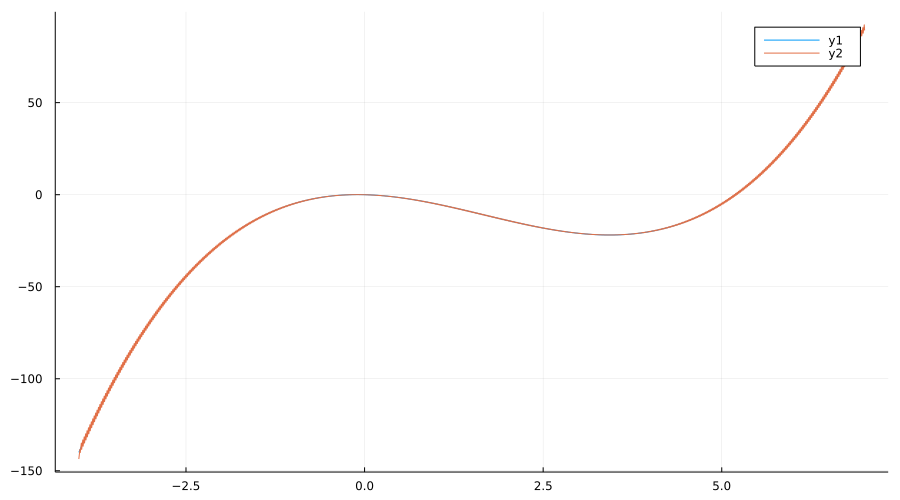

In [52]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [9]:
# test with normal


#the input data
#T from a to b with δt as step
a = -4.0
δt = 0.01
b = 4
T = a:δt:b
Y = 100*sin.(2*π*10*T)
N = length(Y)
L = floor(Int, N/2)
M = 5
##############################################################################################
#the algorithm

    #Hankel(first col, lasr row)
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
s = svd(pinv(I(N-L-1)Y1))                           #assuming svd transform of a matrix is unique!(but it could be a problem!)
Ze = diagm(s.S)*s.Vt*Y2*s.U
z = eigen(Ze).values
S = log.(z)/δt
zm = z[end-(M-1):end]
#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zm)
vn = ceil(Int, N/M)
V = v
for i in 2:vn
    V = [V diagm(zm).^i*v]
end

Z = V[:, 1:N]
b = Z'\Y
#parameters done!
Ypred = real.(b'*Z)


1×801 Matrix{Float64}:
 1.05119e-12  0.367191  0.226586  …  -0.000567613  -0.227504  0.367191

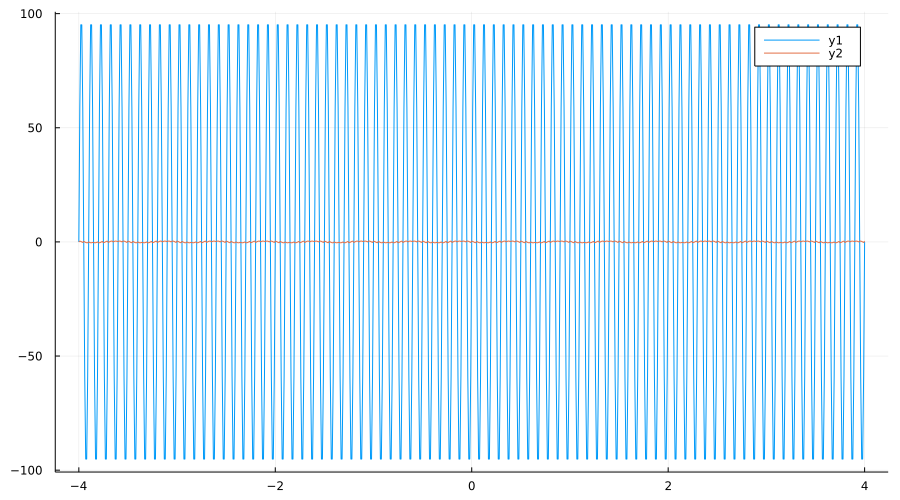

In [10]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [22]:
X = -4.0:0.001:7
Y = X.^3 - 5*X.^2 -X

11001-element Vector{Float64}:
 -140.0
 -139.913016999
 -139.82606799200002
 -139.739152973
 -139.652271936
 -139.56542487500002
 -139.478611784
 -139.391832657
 -139.305087488
 -139.21837627099998
 -139.13169900000003
 -139.045055669
 -138.958446272
    ⋮
   90.165934669
   90.24159900000002
   90.31729527099999
   90.393023488
   90.46878365700005
   90.54457578399999
   90.62039987499998
   90.69625593600001
   90.77214397299996
   90.84806399200004
   90.924015999
   91.0

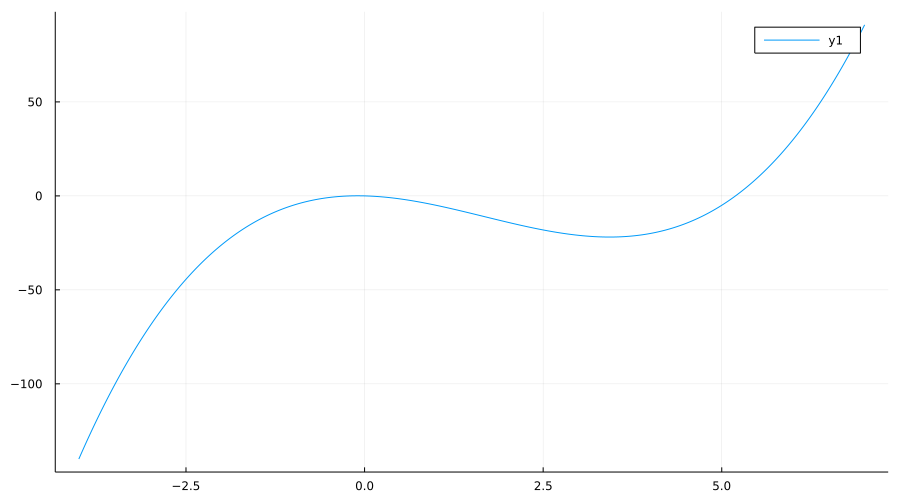

In [23]:
plot(X,Y)
plot!(size=(900,500))